# **Traffic Flow Forecasting**
Problem Statement
Given a univariate time series data of number of vehicles each hour in four different junctions,


*   Forecastfor the next several days' number of vehicles



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import adfuller,kpss,acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
traffic_df=pd.read_csv("https://raw.githubusercontent.com/Souvik4199/Time-Series-Forecasting-Using-ARIMA-SARIMA-Model/main/traffic.csv")
traffic_df

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
traffic_df.shape

(48120, 4)

In [ ]:
traffic_df.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [ ]:
# convert to datetime type
traffic_df['DateTime'] = pd.to_datetime(traffic_df['DateTime'])
traffic_df.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
ID                   int64
dtype: object

In [ ]:
# set datetime to index
traffic_df.set_index('DateTime', inplace=True)

In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48120 entries, 2015-11-01 00:00:00 to 2017-06-30 23:00:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
 1   Vehicles  48120 non-null  int64
 2   ID        48120 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [ ]:
# check for null values
traffic_df.isnull().sum()

Junction    0
Vehicles    0
ID          0
dtype: int64

In [ ]:

# Resample data by days and average the 'Vehicles' for each day
daily_traffic_df = traffic_df.resample('D').mean()

# Create the line chart with dark background and specified color
fig = go.Figure()

fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=daily_traffic_df['Vehicles'],
                         mode='lines', line_shape='linear', line=dict(color='#2ED9FF')))

fig.update_layout(title='Average Daily Traffic Flow',
                  xaxis=dict(title='Date',gridcolor='rgba(255, 255, 255, 0.2)', gridwidth=0.5),
                  yaxis=dict(title='Number of Vehicles',gridcolor='rgba(255, 255, 255, 0.2)', gridwidth=0.5),
                  paper_bgcolor='black',  # Background color
                  plot_bgcolor='black',   # Plot area background color
                  font=dict(color='white')  # Text color
                  )

fig.show()


In [ ]:

# Resample data by days and sum the 'Vehicles' for each day
daily_traffic_df = traffic_df.resample('D').sum()

# Create the line chart with style and layout matching the given chart
fig = go.Figure()

fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=daily_traffic_df['Vehicles'],
                         mode='lines', line=dict(color='#2ED9FF', width=2)))

fig.update_layout(
    title='Total Daily Traffic Flow',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of Vehicles'),
                      paper_bgcolor='black',  # Background color
                  plot_bgcolor='black',   # Plot area background color
                  font=dict(color='white'),  # Text color
    showlegend=False,
    template='plotly_dark',
    width=1200,
    height=500
)

fig.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=traffic_df['Vehicles'], nbinsx=20, histnorm='probability density',
                            marker=dict(color='#2ED9FF', line=dict(color='black', width=1))))

fig.update_layout(
    title='Distribution of Traffic Volumes',
    xaxis=dict(title='Number of Vehicles'),
    yaxis=dict(title='probability density'),
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    showlegend=False,
    template='plotly_dark',
    width=800,
    height=500
)
fig.update_xaxes(
    tickvals=[25, 50, 75, 100, 125, 150, 175],
    ticktext=['25', '50', '75', '100', '125', '150', '175'],
)


fig.update_layout(bargap=0.1)  # Adjust the gap between bars

fig.show()


In [ ]:
#Choose a small subset of the dataset to work with. (e.g. Junction 1 data)
junc1 = traffic_df[traffic_df['Junction']==1]
junc2 = traffic_df[traffic_df['Junction'] == 2]
junc3 = traffic_df[traffic_df['Junction'] == 3]
junc4 = traffic_df[traffic_df['Junction'] == 4]


junc1.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [ ]:
print(junc1.shape)
print(junc2.shape)
print(junc3.shape)
print(junc4.shape)


(14592, 3)
(14592, 3)
(14592, 3)
(4344, 3)


In [ ]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=junc1.index, y=junc1['Vehicles'], mode='lines', line=dict(color='#FEAF16', width=2)))

fig.update_layout(
    title='Traffic Volumes at Junc_1 over the years',
    xaxis=dict(title='Date_Time'),
    yaxis=dict(title='Number of Vehicles'),
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    showlegend=False,
    template='plotly_dark',
    width=1200,
    height=500
)

fig.show()


In [ ]:
import plotly.express as px

def plot_histogram(junction_df, junction_number):
    fig = px.histogram(junction_df, x='Vehicles', nbins=20, histnorm='probability density',
                       title=f'Distribution of Traffic Volumes - Junction {junction_number}',
                       labels={'Vehicles': 'Number of Vehicles', 'count': 'Probability Density'},
                       template='plotly_dark',
                        color_discrete_sequence=['#2ED9FF'])

    fig.update_layout(
        xaxis=dict(title='Number of Vehicles'),
        yaxis=dict(title='Probability Density'),
        paper_bgcolor='black',  # Background color
        plot_bgcolor='black',   # Plot area background color
        font=dict(color='white'),  # Text color
        showlegend=False,
        width=800,
        height=500,
        bargap=0.1  # Adjust the gap between bars
    )

    # Show the figure with the desired style and layout
    fig.show()

# Example usage for Junction 1
plot_histogram(junc1, 1)
plot_histogram(junc2, 2)
plot_histogram(junc3, 3)
plot_histogram(junc4, 4)


In [ ]:
# resample the data as daily average
daily_junc1 = junc1['Vehicles'].resample('D').mean().to_frame(name='Vehicles')
daily_junc2 = junc2['Vehicles'].resample('D').mean().to_frame(name='Vehicles')
daily_junc3 = junc3['Vehicles'].resample('D').mean().to_frame(name='Vehicles')
daily_junc4 = junc4['Vehicles'].resample('D').mean().to_frame(name='Vehicles')

In [ ]:
import plotly.graph_objects as go

def plot_line_chart(daily_data, junction_number):
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=daily_data.index, y=daily_data['Vehicles'],
                             mode='lines', line=dict(color='#2ED9FF', width=2)))

    fig.update_layout(
        title=f'Avg Daily Traffic Volumes at Junc_{junction_number} over the years',
        xaxis=dict(title='Date_Time'),
        yaxis=dict(title='Number of Vehicles'),
        paper_bgcolor='black',  # Background color
        plot_bgcolor='black',   # Plot area background color
        font=dict(color='white'),  # Text color
        showlegend=False,
        template='plotly_dark',
        width=1200,
        height=500
    )

    # Show the figure with the desired style and layout
    fig.show()

# Example usage for Junction 1
plot_line_chart(daily_junc1, 1)
plot_line_chart(daily_junc2, 2)
plot_line_chart(daily_junc3, 3)
plot_line_chart(daily_junc4, 4)



In [ ]:

# Assuming 'Junction' is the column containing junction information
junction_counts = traffic_df['Junction'].value_counts()

fig = px.bar(x=junction_counts.index, y=junction_counts.values, color=junction_counts.values,
             labels={'x': 'Junctions', 'y': 'Count'}, color_continuous_scale='Bluered')

fig.update_layout(
    title='Traffic Count by Junctions',
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    width=800,
    height=500,
    xaxis=dict(tickmode='array', tickvals=junction_counts.index, ticktext=junction_counts.index),
    yaxis=dict(gridcolor='rgba(255, 255, 255, 0.2)', gridwidth=0.5)
)

fig.show()


In [ ]:
import plotly.express as px

# Assuming 'Junction' is the column containing junction information
fig = px.box(traffic_df, x='Junction', y='Vehicles',
             labels={'Junction': 'Junctions', 'Vehicles': 'Number of Vehicles'},
             title='Box Plot of Traffic Volumes by Junctions',
             color='Junction',
             color_discrete_sequence=['#F6222E', '#1CFFCE', '#98FB98', '#FFD700'])  # Specify your own color codes

fig.update_layout(
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    width=800,
    height=500,
    yaxis=dict(gridcolor='rgba(255, 255, 255, 0.2)', gridwidth=0.5, dtick=30)

)

fig.show()


**Extend the dataframe**

In [ ]:

# Assuming 'DateTime' is the index of the DataFrame
traffic_df.index = pd.to_datetime(traffic_df.index)  # Convert the index to datetime format

# Extract the year component and create a new column 'Year' in 'traffic_df'
traffic_df['Year'] = traffic_df.index.year

# Extract the month component and create a new column 'Month' in 'traffic_df'
traffic_df['Month'] = traffic_df.index.month

# Extract the day component and create a new column 'Day' in 'traffic_df'
traffic_df['Day'] = traffic_df.index.day

# Extract the hour component and create a new column 'Hour' in 'traffic_df'
traffic_df['Hour'] = traffic_df.index.hour

# Extract the day of the week as a string and create a new column 'DayOfWeek' in 'traffic_df'
traffic_df['DayOfWeek'] = traffic_df.index.strftime("%A")

traffic_df = traffic_df.drop('ID', axis=1)  # Drop the 'ID' column

traffic_df.head()


,Junction,Vehicles,Year,Month,Day,Hour,DayOfWeek
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


In [ ]:
# Assuming 'Hour' and 'DayOfWeek' columns have been created in the DataFrame
# Aggregate data to find mean traffic volume for each hour of the day
hourly_traffic = traffic_df.groupby('Hour')['Vehicles'].mean().reset_index()

# Aggregate data to find mean traffic volume for each day of the week
weekly_traffic = traffic_df.groupby('DayOfWeek')['Vehicles'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()


In [ ]:

# Assuming 'Hour' and 'Vehicles' columns exist in 'hourly_traffic'
fig = go.Figure()

fig.add_trace(go.Bar(
    x=hourly_traffic['Hour'],
    y=hourly_traffic['Vehicles'],
    marker=dict(color=hourly_traffic['Vehicles'], coloraxis="coloraxis"),
))

fig.update_layout(
    title='Average Traffic Volume by Hour of Day',
    xaxis=dict(title='Hour of Day', tickmode='array', tickvals=list(range(1, 24)), ticktext=list(range(1, 24))),
    yaxis=dict(title='Average Traffic Volume', gridcolor='rgba(255, 255, 255, 0.2)', gridwidth=0.5),
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    width=1000,
    height=500,
    coloraxis=dict(colorscale='Bluered')  # Choose the desired color scale
)

fig.show()


In [ ]:

# Assuming 'DayOfWeek' and 'Vehicles' columns exist in 'weekly_traffic'
fig = go.Figure()

fig.add_trace(go.Bar(
    x=weekly_traffic['DayOfWeek'],
    y=weekly_traffic['Vehicles'],
    marker=dict(color=weekly_traffic['Vehicles'], coloraxis="coloraxis"),
))

fig.update_layout(
    title='Average Traffic Volume by Day of Week',
    xaxis=dict(title='Day of Week'),
    yaxis=dict(title='Average Traffic Volume'),
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    width=600,
    height=500,
    coloraxis=dict(colorscale='Viridis')  # Choose the desired color scale
)

fig.show()


In [ ]:
import plotly.express as px

# Assuming 'Vehicles' is the column you want to analyze in the subset DataFrame
subset_weekly_traffic = traffic_df.groupby(['DayOfWeek', 'Month'])['Vehicles'].mean().reset_index()

# Reorder days of the week for better plotting
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
subset_weekly_traffic['DayOfWeek'] = pd.Categorical(subset_weekly_traffic['DayOfWeek'], categories=order_days, ordered=True)

# Create a bar chart using Plotly Express
fig = px.bar(subset_weekly_traffic, x='DayOfWeek', y='Vehicles', color='Month',
             title='Mean Traffic Volume by Day of the Week (Aggregated by Month)',
             labels={'DayOfWeek': 'Day of the Week', 'Vehicles': 'Mean Traffic Volume'},
             template='plotly_dark')

# Reorder months for better plotting
order_months = list(range(1, 13))
fig.update_xaxes(categoryorder='array', categoryarray=order_days)
fig.show()


In [ ]:
import plotly.express as px
import calendar

# Assuming 'Vehicles' is the column you want to analyze in the subset DataFrame
monthly_traffic = traffic_df.groupby('Month')['Vehicles'].mean().reset_index()

# Map numeric month values to month names
monthly_traffic['Month'] = monthly_traffic['Month'].apply(lambda x: calendar.month_abbr[x])

# Create a bar chart using Plotly Express with color scale
fig = px.bar(monthly_traffic, x='Month', y='Vehicles', color='Vehicles',
             title='Mean Traffic Volume by Month',
             labels={'Month': 'Month', 'Vehicles': 'Mean Traffic Volume'},
             template='plotly_dark',
             color_continuous_scale='plasma',
             width=1000,
             height=500)  # You can choose any color scale

# Show month names on the x-axis
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=list(calendar.month_abbr)[1:])
fig.show()


### **Traffic Anomaly Detection**

In [ ]:


# Resample the data by day and calculate the mean
traffic_data_daily = traffic_df.resample('D').mean()

# Calculate the Z-score for each day's traffic volume
traffic_data_daily['z_score'] = (traffic_data_daily['Vehicles'] - traffic_data_daily['Vehicles'].mean()) / traffic_data_daily['Vehicles'].std()

# Identify days where the Z-score is above a certain threshold (e.g., 2 or -2 for significant anomalies)
anomalies = traffic_data_daily[abs(traffic_data_daily['z_score']) > 2]

# Create a Plotly figure
fig = go.Figure()

# Plot daily traffic volume
fig.add_trace(go.Scatter(x=traffic_data_daily.index, y=traffic_data_daily['Vehicles'], mode='lines', name='Daily Traffic Volume'))

# Mark anomalies with red dots
fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies['Vehicles'], mode='markers', marker=dict(color='red'), name='Anomalies'))

# Update layout for better formatting
fig.update_layout(
    title='Traffic Volume Over Time with Anomalies',
    xaxis=dict(title='Date', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),
    yaxis=dict(title='Average Daily Traffic Volume', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    legend=dict(font=dict(color='white')),  # Legend text color
    width=1200,
    height=600
)

# Show the figure
fig.show()


<ipython-input-26-42d6dc292f4d>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
traffic_df.head()

,Junction,Vehicles,Year,Month,Day,Hour,DayOfWeek
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


In [ ]:
# Assuming you already have a DataFrame named traffic_df
traffic_df.to_csv('output_file.csv', index=False)


# **Time Series Analysis & Forecasting**

In [ ]:
# Assuming 'Vehicles' is the column you want to analyze in the DataFrame
daily_traffic_df = traffic_df.resample('1D').mean().reset_index()
daily_traffic_df = daily_traffic_df.fillna(0)

# Set 'DateTime' as the index
daily_traffic_df.set_index('DateTime', inplace=True, drop=False)

# Convert 'Vehicles' column to integer
daily_traffic_df['Vehicles'] = daily_traffic_df['Vehicles'].round().astype(int)


# Display the first few rows of the DataFrame
daily_traffic_df.head()


<ipython-input-29-771ec4e7673f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,DateTime,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,,
2015-11-01,2015-11-01,2.0,8,2015.0,11.0,1.0,11.5
2015-11-02,2015-11-02,2.0,13,2015.0,11.0,2.0,11.5
2015-11-03,2015-11-03,2.0,13,2015.0,11.0,3.0,11.5
2015-11-04,2015-11-04,2.0,11,2015.0,11.0,4.0,11.5
2015-11-05,2015-11-05,2.0,11,2015.0,11.0,5.0,11.5


In [ ]:
daily_traffic_df.shape

(608, 7)

In [ ]:
#daily_target.to_csv('daily_target.csv', index=False)

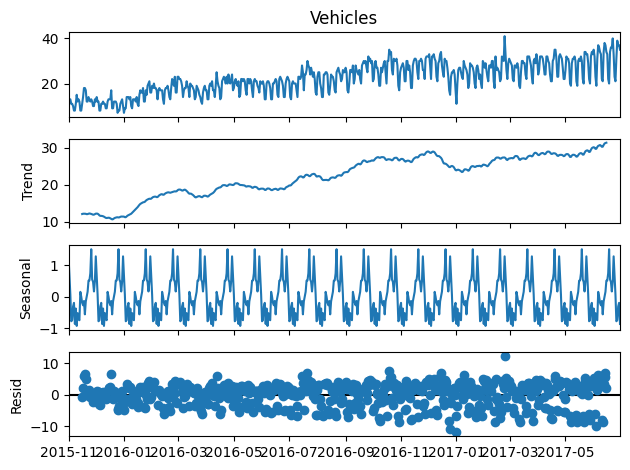

In [ ]:
# Time Series Decomposition
decomposition = seasonal_decompose(daily_traffic_df['Vehicles'], model='additive',period=30)
plt.figsize=(25,8)
decomposition.plot()
plt.show()

In [ ]:

# Assuming 'Vehicles' is the column you want to decompose in 'daily_traffic_df'
# Perform time series decomposition
decomposition = seasonal_decompose(daily_traffic_df['Vehicles'], model='multiplicative')

# Plot the trend, seasonal, and residual components
fig = go.Figure()

# Add trace for the observed data
fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.observed,
                         mode='lines', name='Observed', line=dict(color='#2ED9FF', width=2)))

# Add trace for the trend component
fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.trend,
                         mode='lines', name='Trend', line=dict(color='green', width=2)))

# Add trace for the seasonal component
fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.seasonal,
                         mode='lines', name='Seasonal', line=dict(color='red', width=2)))

# Add trace for the residual component
fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.resid,
                         mode='lines', name='Residual', line=dict(color='purple', width=2)))

# Update layout for better formatting
fig.update_layout(
    title='Time Series Decomposition',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Number of Vehicles'),
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    width=1200,
    height=500,
    legend=dict(orientation='h', x=0.5, y=1.1)
)

fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Vehicles' is the column you want to decompose in 'daily_traffic_df'
# Perform time series decomposition
decomposition = seasonal_decompose(daily_traffic_df['Vehicles'], model='additive')

# Create subplots for each component
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'])

# Add traces for each component
fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.observed,
                         mode='lines', line=dict(color='#2ED9FF', width=2)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.trend,
                         mode='lines', line=dict(color='green', width=2)),
              row=2, col=1)

fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.seasonal,
                         mode='lines', line=dict(color='red', width=2)),
              row=3, col=1)

fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.resid,
                         mode='lines', line=dict(color='purple', width=2)),
              row=4, col=1)

# Update layout for better formatting
fig.update_layout(
    title='Time Series Decomposition of Additive Model',
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    width=800,
    height=600
)

# Update x-axis label for the last subplot
fig.update_xaxes(title_text='Date', row=4, col=1)

fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Vehicles' is the column you want to decompose in 'daily_traffic_df'
# Perform time series decomposition
decomposition = seasonal_decompose(daily_traffic_df['Vehicles'], model='multiplicative')

# Create subplots for each component
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual'])

# Add traces for each component
fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.observed,
                         mode='lines', line=dict(color='#2ED9FF', width=2)),
              row=1, col=1)

fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.trend,
                         mode='lines', line=dict(color='green', width=2)),
              row=2, col=1)

fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.seasonal,
                         mode='lines', line=dict(color='red', width=2)),
              row=3, col=1)

fig.add_trace(go.Scatter(x=daily_traffic_df.index, y=decomposition.resid,
                         mode='lines', line=dict(color='purple', width=2)),
              row=4, col=1)

# Update layout for better formatting
fig.update_layout(
    title='Time Series Decomposition of Multiplicative Model ',
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    width=800,
    height=600
)

# Update x-axis label for the last subplot
fig.update_xaxes(title_text='Date', row=4, col=1)

fig.show()


**Observed:**
This is the actual traffic volume data. The plot shows fluctuations over time, which seem to repeat in a pattern, suggesting some seasonality in the data.

**Trend:** This component shows a smoothed version of the observed data, highlighting the long-term progression or changes in traffic volume. The trend line indicates that overall traffic volume may have some periods of increase or decrease, but without more context, it's hard to draw definitive conclusions. There are some fluctuations in the trend as well, which may correspond to underlying factors affecting traffic volume over a longer period.

**Seasonality:** The seasonal component captures the regular pattern within the data that repeats over a specific period, which in this case is assumed to be weekly since the decomposition was likely done with a period of 7. The pattern is very consistent, showing peaks and troughs at regular intervals. This could correspond to higher traffic volumes on specific days of the week and lower on others, which might be associated with typical workweek patterns.

**Residual:** These are the irregularities or noise left after the trend and seasonal components have been removed from the observed data. The residuals appear to be randomly scattered around zero without any discernible pattern, which suggests that the model has captured the trend and seasonality well. However, there are a few outliers, indicating occasional deviations from the expected traffic volume that weren't explained by the trend or seasonal components.

Overall, the decomposition suggests that there is a strong seasonal pattern in the data, with some long-term trends and random noise. The insights from this analysis can help in forecasting traffic volumes, planning city infrastructure, and managing peak traffic times. Understanding the trend can be particularly useful for long-term planning, while the seasonal component can inform short-term operational decisions, such as traffic light coordination and congestion management strategies

In [ ]:
daily_traffic_df1=daily_traffic_df[['DateTime','Vehicles']]
daily_traffic_df1

,DateTime,Vehicles
DateTime,,
2015-11-01,2015-11-01,8
2015-11-02,2015-11-02,13
2015-11-03,2015-11-03,13
2015-11-04,2015-11-04,11
2015-11-05,2015-11-05,11
...,...,...
2017-06-26,2017-06-26,31
2017-06-27,2017-06-27,39
2017-06-28,2017-06-28,37


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'traffic_df' is your DataFrame and 'Vehicles' is the column of interest
# Replace 'Vehicles' and 'traffic_df' with your actual column and DataFrame names

# Add a constant term to the independent variable (assuming you are performing a simple regression)
X = sm.add_constant(daily_traffic_df1['Vehicles'])

# Fit the regression model
model = sm.OLS(daily_traffic_df1['Vehicles'], X).fit()

# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.durbin_watson(model.resid)

print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

# Interpret the results
if durbin_watson_statistic < 2:
    print('Positive autocorrelation may be present.')
elif durbin_watson_statistic > 2:
    print('Negative autocorrelation may be present.')
else:
    print('No significant autocorrelation detected.')


Durbin-Watson Statistic: 0.012921426108394448
Positive autocorrelation may be present.


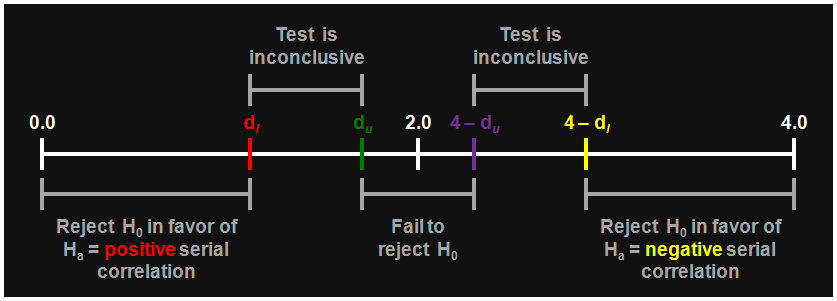

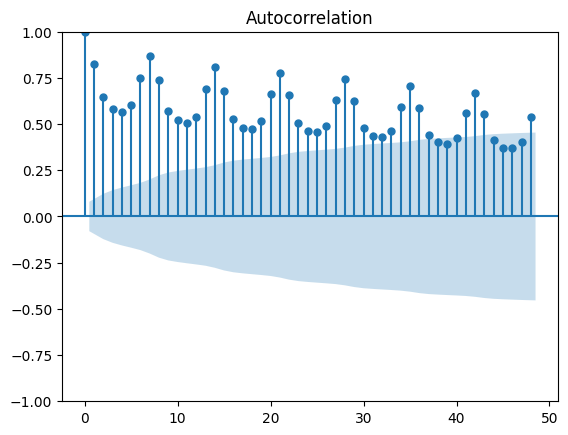

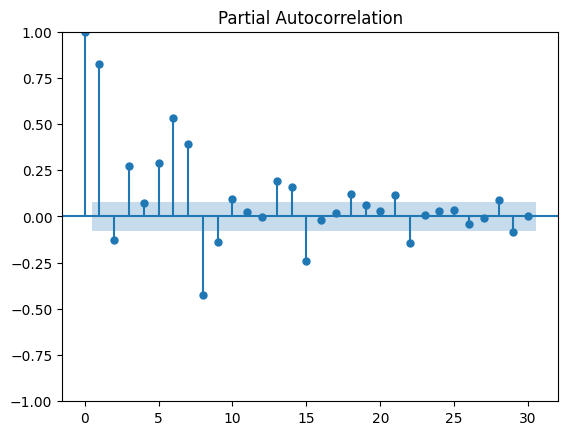

In [ ]:
plot_acf(daily_traffic_df1['Vehicles'],lags=48, alpha=0.05);
plot_pacf(daily_traffic_df1['Vehicles'], lags=30, alpha=0.05);

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
x_acf=pd.DataFrame(acf(daily_traffic_df1['Vehicles']))

print(x_acf)


           0
0   1.000000
1   0.827755
2   0.645401
3   0.581705
4   0.563264
5   0.600907
6   0.749940
7   0.868793
8   0.736790
9   0.570218
10  0.520675
11  0.506239
12  0.538011
13  0.690216
14  0.808260
15  0.681148
16  0.525661
17  0.476983
18  0.472513
19  0.513987
20  0.661063
21  0.779015
22  0.655140
23  0.505075
24  0.462831
25  0.455859
26  0.489796
27  0.628081


In [ ]:
x_pacf=pd.DataFrame(acf(daily_traffic_df1['Vehicles']))
print(x_pacf)

           0
0   1.000000
1   0.827755
2   0.645401
3   0.581705
4   0.563264
5   0.600907
6   0.749940
7   0.868793
8   0.736790
9   0.570218
10  0.520675
11  0.506239
12  0.538011
13  0.690216
14  0.808260
15  0.681148
16  0.525661
17  0.476983
18  0.472513
19  0.513987
20  0.661063
21  0.779015
22  0.655140
23  0.505075
24  0.462831
25  0.455859
26  0.489796
27  0.628081




# *   q = 1
# *   p = 1



In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries, target_name):
    print(f"Results of Dickey-Fuller Test for {target_name}:")
    print('-' * 40)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value

    print(dfoutput)

    # Interpret the results
    print('\nInterpretation:')
    if dfoutput['p-value'] <= 0.05:
        print("The p-value is less than or equal to 0.05. Reject the null hypothesis.")
        print("The time series is likely stationary.")
    else:
        print("The p-value is greater than 0.05. Fail to reject the null hypothesis.")
        print("The time series is likely non-stationary.")

# Assuming 'Vehicles' is the column you want to test in daily_traffic_df
target_column = 'Vehicles'
adf_test(daily_traffic_df1[target_column], target_column)


Results of Dickey-Fuller Test for Vehicles:
----------------------------------------
Test Statistic                  -1.021371
p-value                          0.745390
#Lags Used                      19.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64

Interpretation:
The p-value is greater than 0.05. Fail to reject the null hypothesis.
The time series is likely non-stationary.


<ipython-input-42-591207f56fc7>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




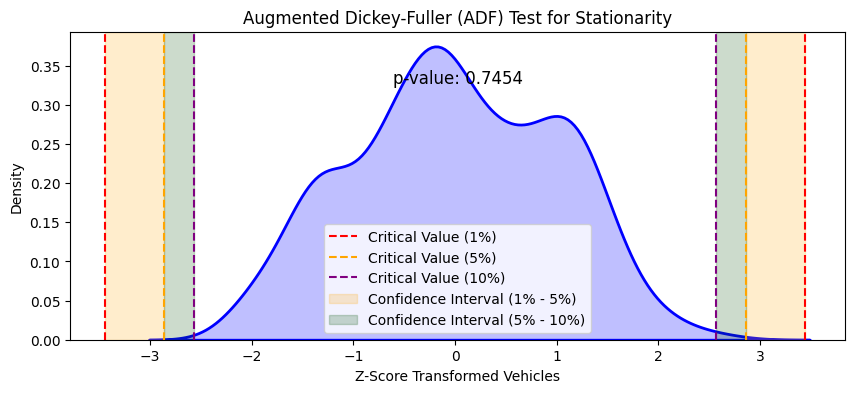

In [ ]:

from sklearn.preprocessing import StandardScaler
def visualize_adf_test(timeseries, target_name):
    # Apply Z-score transformation
    scaler = StandardScaler()
    timeseries_zscore = scaler.fit_transform(timeseries.values.reshape(-1, 1)).flatten()

    # Plot the bell-shaped curve with confidence intervals
    plt.figure(figsize=(10, 4))
    sns.distplot(timeseries_zscore, hist=False, kde=True, color='blue',
                 kde_kws={'linewidth': 2, 'shade': True})

    plt.title(f'Augmented Dickey-Fuller (ADF) Test for Stationarity')
    plt.xlabel(f'Z-Score Transformed {target_name}')
    plt.ylabel('Density')

    # Plot critical values as vertical lines for both tails
    critical_values = adfuller(timeseries_zscore, autolag='AIC')[4]
    colors = ['red', 'orange', 'purple']  # Specify different colors for critical values
    for i, (key, value) in enumerate(critical_values.items()):
        plt.axvline(x=value, linestyle='--', color=colors[i], label=f'Critical Value ({key})')
        plt.axvline(x=-value, linestyle='--', color=colors[i])

    # Plot confidence intervals for both tails
    plt.axvspan(critical_values['1%'], critical_values['5%'], alpha=0.2, color='#FFA500', label='Confidence Interval (1% - 5%)')  # Darker Yellow
    plt.axvspan(-critical_values['1%'], -critical_values['5%'], alpha=0.2, color='#FFA500')

    plt.axvspan(critical_values['5%'], critical_values['10%'], alpha=0.2, color='#004d00', label='Confidence Interval (5% - 10%)')  # Darker Green
    plt.axvspan(-critical_values['5%'], -critical_values['10%'], alpha=0.2, color='#004d00')

    # Display the p-value on the plot
    p_value = adfuller(timeseries_zscore, autolag='AIC')[1]
    plt.text(0.5, 0.85, f'p-value: {p_value:.4f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

    # Add legend
    plt.legend()

    plt.show()

# Assuming 'Vehicles' is the column you want to test in daily_traffic_df
target_column = 'Vehicles'
visualize_adf_test(daily_traffic_df1[target_column], target_column)



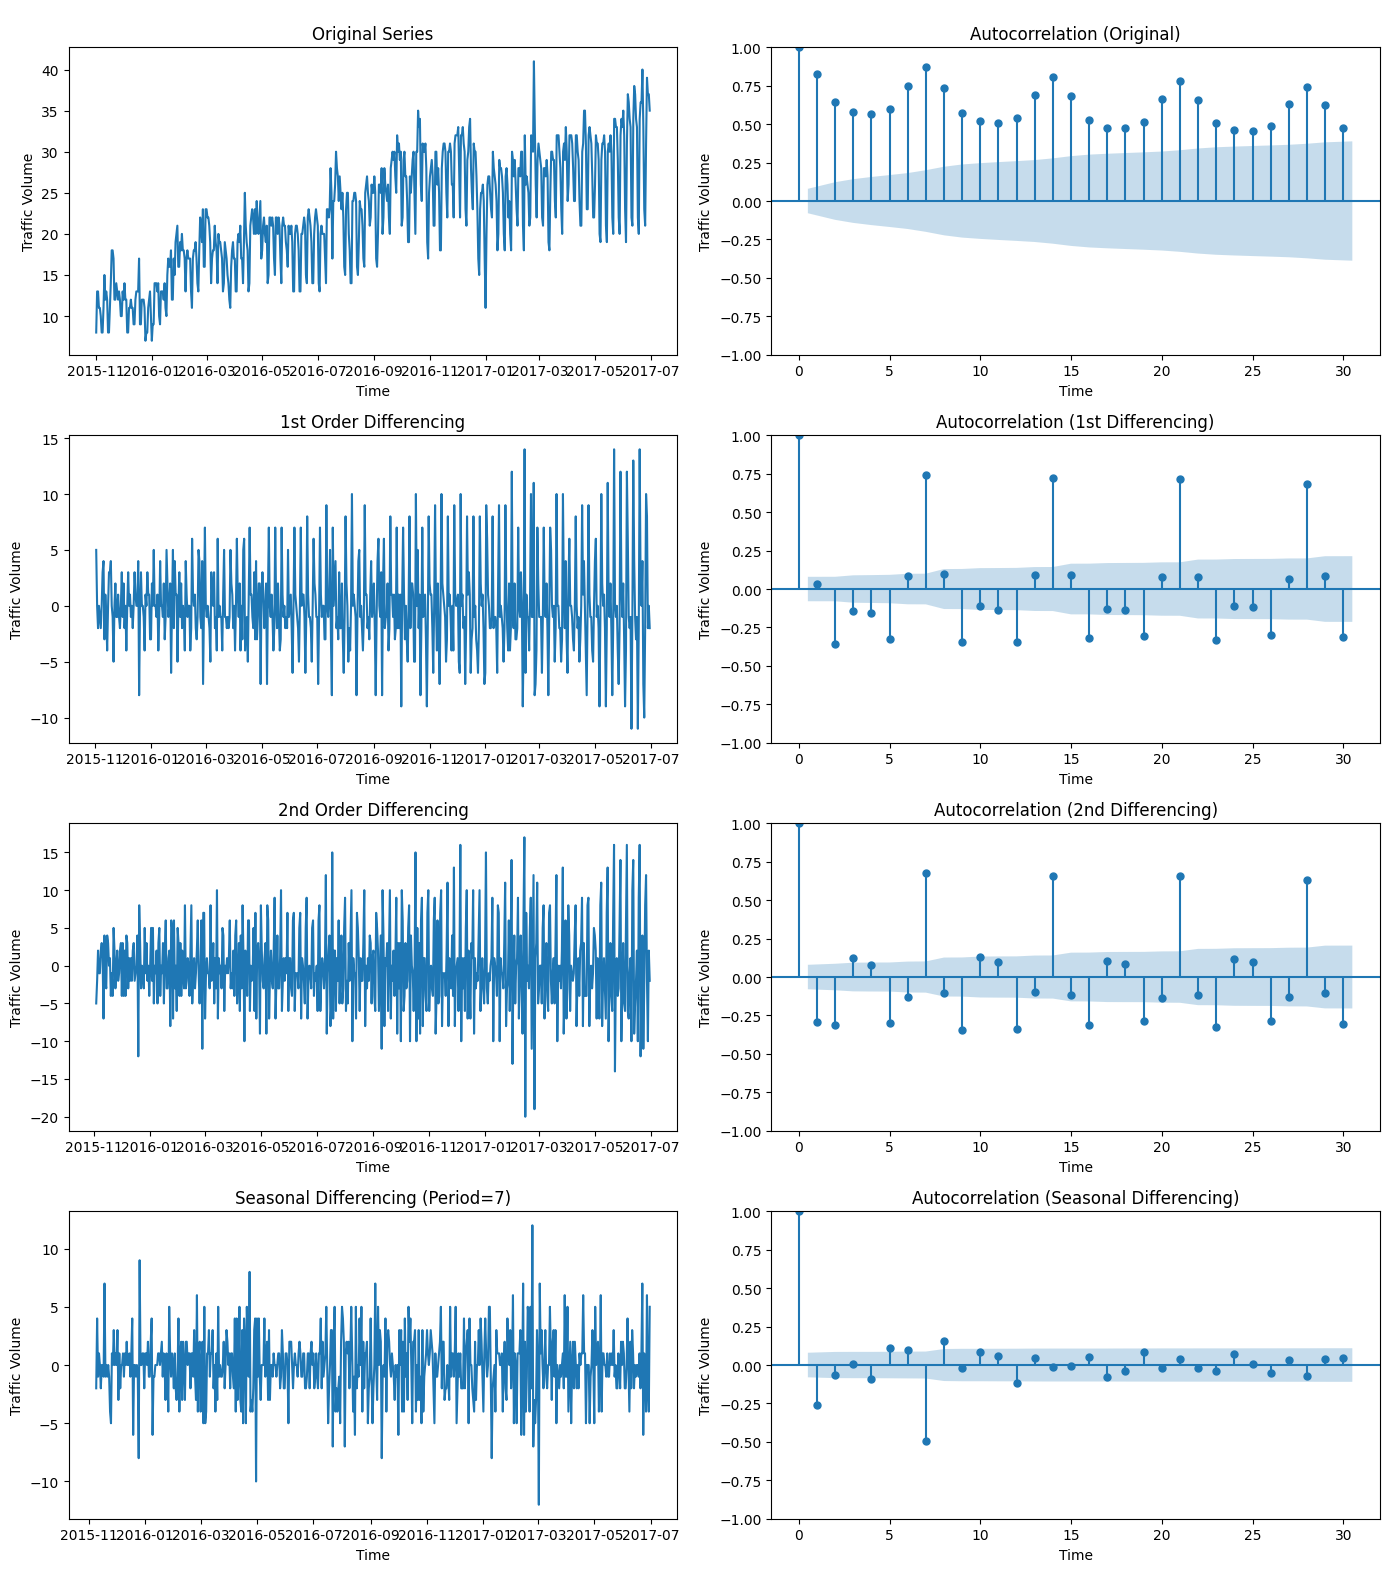

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle('Differencing and Autocorrelation Visualization', color='white')

# Plot original series
axes[0, 0].plot(daily_traffic_df1['Vehicles'])
axes[0, 0].set_title('Original Series')

# Plot autocorrelation for original series
plot_acf(daily_traffic_df1['Vehicles'], lags=30, ax=axes[0, 1])
axes[0, 1].set_title('Autocorrelation (Original)')

# 1st Differencing
axes[1, 0].plot(daily_traffic_df1['Vehicles'].diff())
axes[1, 0].set_title('1st Order Differencing')

# Autocorrelation for 1st differencing
plot_acf(daily_traffic_df1['Vehicles'].diff().dropna(), lags=30, ax=axes[1, 1])
axes[1, 1].set_title('Autocorrelation (1st Differencing)')

# 2nd Differencing
axes[2, 0].plot(daily_traffic_df1['Vehicles'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')

# Autocorrelation for 2nd differencing
plot_acf(daily_traffic_df1['Vehicles'].diff().diff().dropna(), lags=30, ax=axes[2, 1])
axes[2, 1].set_title('Autocorrelation (2nd Differencing)')

# Seasonal Differencing (Period=7)
axes[3, 0].plot(daily_traffic_df1['Vehicles'].diff(7).diff())
axes[3, 0].set_title('Seasonal Differencing (Period=7)')

# Autocorrelation for seasonal differencing
plot_acf(daily_traffic_df1['Vehicles'].diff(7).diff().dropna(), lags=30, ax=axes[3, 1])
axes[3, 1].set_title('Autocorrelation (Seasonal Differencing)')

# Set common labels
for ax in axes.flatten():
    ax.set_xlabel('Time')
    ax.set_ylabel('Traffic Volume')

# Show the figure
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming daily_traffic_df['Vehicles'] is your target variable
target_variable = 'Vehicles'

# Seasonal differencing with a period of 7
daily_traffic_df1['Stationary_Vehicles'] = daily_traffic_df1[target_variable].diff(7)

# Drop NaN values resulting from differencing
daily_traffic_df1.dropna(inplace=True)

# Display the head of the dataframe
print(daily_traffic_df1.head())


             DateTime  Vehicles  Stationary_Vehicles
DateTime                                            
2015-11-08 2015-11-08         8                  0.0
2015-11-09 2015-11-09        11                 -2.0
2015-11-10 2015-11-10        15                  2.0
2015-11-11 2015-11-11        12                  1.0
2015-11-12 2015-11-12        13                  2.0


<ipython-input-44-fa23d86ec84e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-fa23d86ec84e>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Create the line chart with dark background and specified color
fig = go.Figure()

fig.add_trace(go.Scatter(x=daily_traffic_df1.index, y=daily_traffic_df1['Stationary_Vehicles'],
                         mode='lines', line_shape='linear', line=dict(color='#2ED9FF')))

fig.update_layout(title='Daily Traffic Flow',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Number of Vehicles'),
                  paper_bgcolor='black',  # Background color
                  plot_bgcolor='black',   # Plot area background color
                  font=dict(color='white')  # Text color
                  )

fig.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'Stationary_Vehicles' is the column resulting from seasonal differencing
adf_test_result = adfuller(daily_traffic_df1['Stationary_Vehicles'], autolag='AIC')

# Extract and print the results
print('Results of Dickey-Fuller Test:')
print('-' * 30)
adf_output = pd.Series(adf_test_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_test_result[4].items():
    adf_output[f'Critical Value ({key})'] = value

print(adf_output)


Results of Dickey-Fuller Test:
------------------------------
Test Statistic                -7.524385e+00
p-value                        3.717931e-11
#Lags Used                     1.400000e+01
Number of Observations Used    5.860000e+02
Critical Value (1%)           -3.441558e+00
Critical Value (5%)           -2.866485e+00
Critical Value (10%)          -2.569403e+00
dtype: float64


In [ ]:
df=daily_traffic_df1[['DateTime','Vehicles','Stationary_Vehicles']]
df

,DateTime,Vehicles,Stationary_Vehicles
DateTime,,,
2015-11-08,2015-11-08,8,0.0
2015-11-09,2015-11-09,11,-2.0
2015-11-10,2015-11-10,15,2.0
2015-11-11,2015-11-11,12,1.0
2015-11-12,2015-11-12,13,2.0
...,...,...,...
2017-06-26,2017-06-26,31,-3.0
2017-06-27,2017-06-27,39,3.0
2017-06-28,2017-06-28,37,1.0


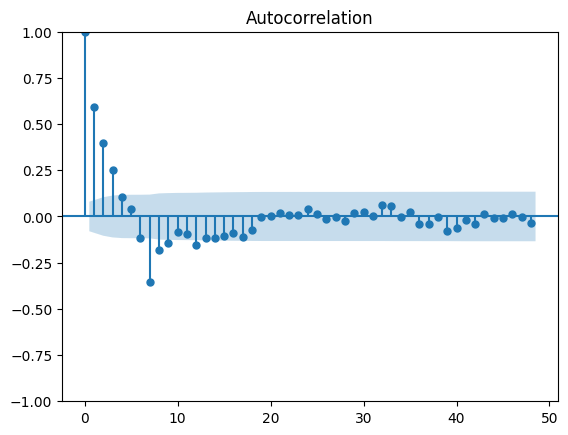

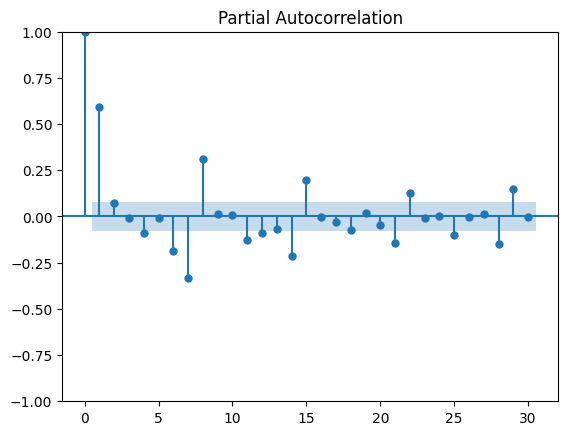

In [ ]:
plot_acf(df['Stationary_Vehicles'],lags=48, alpha=0.05);
plot_pacf(df['Stationary_Vehicles'], lags=30, alpha=0.05);

In [ ]:
x_acf1=pd.DataFrame(acf(df['Stationary_Vehicles']))
x_pacf1=pd.DataFrame(acf(df['Stationary_Vehicles']))
print(x_acf1)
print(x_pacf1)

           0
0   1.000000
1   0.590264
2   0.395460
3   0.254122
4   0.107749
5   0.040016
6  -0.117058
7  -0.352219
8  -0.181842
9  -0.140992
10 -0.084911
11 -0.096428
12 -0.155112
13 -0.117560
14 -0.117741
15 -0.106755
16 -0.089042
17 -0.112403
18 -0.071507
19 -0.001043
20  0.002712
21  0.021188
22  0.006923
23  0.007674
24  0.040573
25  0.015392
26 -0.015328
27 -0.004551
           0
0   1.000000
1   0.590264
2   0.395460
3   0.254122
4   0.107749
5   0.040016
6  -0.117058
7  -0.352219
8  -0.181842
9  -0.140992
10 -0.084911
11 -0.096428
12 -0.155112
13 -0.117560
14 -0.117741
15 -0.106755
16 -0.089042
17 -0.112403
18 -0.071507
19 -0.001043
20  0.002712
21  0.021188
22  0.006923
23  0.007674
24  0.040573
25  0.015392
26 -0.015328
27 -0.004551


# **ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit ARIMA model
order = (3, 0, 4)  # (p, d, q) order
model = ARIMA(df['Stationary_Vehicles'], order=order)
fit_model = model.fit()

print(fit_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                                SARIMAX Results                                
Dep. Variable:     Stationary_Vehicles   No. Observations:                  601
Model:                  ARIMA(3, 0, 4)   Log Likelihood               -1365.586
Date:                 Tue, 16 Jan 2024   AIC                           2749.172
Time:                         06:07:06   BIC                           2788.759
Sample:                     11-08-2015   HQIC                          2764.581
                          - 06-30-2017                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2532      0.265      0.955      0.339      -0.266       0.773
ar.L1          0.1673      0.173      0.969      0.333      -0.171       0.506
ar.L2         -0.3305      0.099     -3.339 

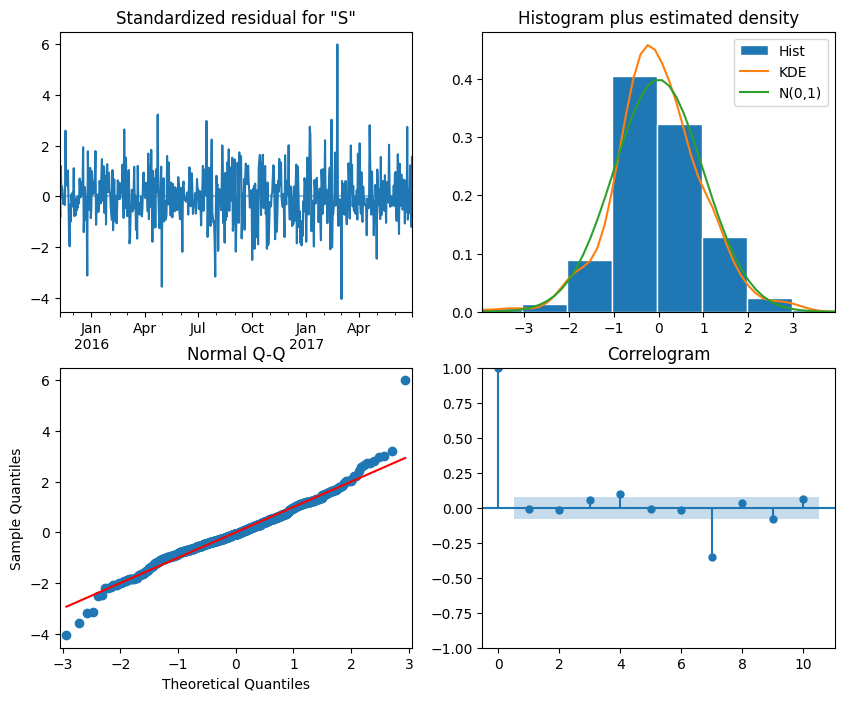

In [ ]:
fit_model.plot_diagnostics(figsize=(10, 8))
plt.show()

In [ ]:
# Forecast for the next 30 days (assuming daily frequency)
forecast_steps = 30
forecast = fit_model.get_forecast(steps=forecast_steps)

# Extract predicted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()


# Create subplots
fig = make_subplots(rows=1, cols=1)

# Plot the actual traffic volume
actual_trace = go.Scatter(x=df.index, y=df['Stationary_Vehicles'], mode='lines', name='Actual Traffic Volume', line=dict(color='#2ED9FF', width=2))
fig.add_trace(actual_trace)

# Plot the fitted values on the training data
fitted_trace = go.Scatter(x=fit_model.fittedvalues.index, y=fit_model.fittedvalues, mode='lines', name='Fitted Values (Training Data)', line=dict(color='green', width=2))
fig.add_trace(fitted_trace)

# Plot the forecasted values
forecast_trace = go.Scatter(x=forecast_values.index, y=forecast_values, mode='lines', name='Forecasted Values', line=dict(color='red', width=2))
fig.add_trace(forecast_trace)

# Plot the 95% confidence intervals
confidence_trace = go.Scatter(x=confidence_intervals.index, y=confidence_intervals.iloc[:, 0], fill='tonexty', mode='lines', name='95% Confidence Intervals', line=dict(color='red', width=0), fillcolor='rgba(255, 0, 0, 0.2)')
fig.add_trace(confidence_trace)

# Update layout for better formatting
fig.update_layout(
    title='ARIMA Out-of-Sample Forecast for Next 30 Days',
    xaxis=dict(title='Time', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),  # Adjust x-axis gridlines
    yaxis=dict(title='Traffic Volume', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),  # Adjust y-axis gridlines
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    showlegend=True,
    width=1100,
    height=500
)

# Show the figure
fig.show()


#  ARIMA with TRAIN-TEST DATA

## **Train-test split : 75:25**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df['Vehicles'] is your target variable
X = df['Vehicles']

# Set the ratio for train-test split (e.g., 75% training, 25% testing)
train_size = 0.75
split_index = int(len(X) * train_size)

# Split the data into training and testing sets
train_data, test_data = X[:split_index], X[split_index:]

# Display the lengths of the training and testing sets
print(f"Length of Training Set: {len(train_data)}")
print(f"Length of Testing Set: {len(test_data)}")


Length of Training Set: 450
Length of Testing Set: 151


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model
order = (1, 1, 1)  # (p, d, q) order
model2 = ARIMA(train_data, order=order)
fit_model2 = model2.fit()

# Display model summary
print(fit_model2.summary())

                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                  450
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1164.886
Date:                Tue, 16 Jan 2024   AIC                           2335.772
Time:                        06:07:07   BIC                           2348.093
Sample:                    11-08-2015   HQIC                          2340.629
                         - 01-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5197      0.041     12.533      0.000       0.438       0.601
ma.L1         -0.9419      0.019    -49.911      0.000      -0.979      -0.905
sigma2        10.4685      0.712     14.702      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test data
predicted_values = fit_model2.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Create a Plotly figure
fig = go.Figure()

# Add actual traffic volume to the plot (Train Data)
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Actual Traffic Volume (Train Data)', line=dict(color='blue')))

# Add actual traffic volume to the plot
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Actual Traffic Volume (Test Data)', line=dict(color='red')))

# Add predicted values to the plot
fig.add_trace(go.Scatter(x=test_data.index, y=predicted_values, mode='lines', name='Predicted Values (Test Data)', line=dict(color='yellow')))

# Add annotation for RMSE value at the top side of the chart
fig.add_annotation(
    x=test_data.index[0],  # X-coordinate for the annotation (first timestamp in the test data)
    y=test_data.max(),  # Y-coordinate for the annotation (maximum traffic volume in the test data)
    text=f'RMSE: {rmse:.2f}',  # Text for the annotation
    showarrow=False,
    xanchor='left',  # Anchor point for x-coordinate (left side)
    yanchor='top',   # Anchor point for y-coordinate (top side)
    bordercolor='white',  # Border color for the annotation box
    borderwidth=2,
    bgcolor='black',  # Background color for the annotation box
    font=dict(color='white'),  # Text color for the annotation
)
# Update layout for better formatting
fig.update_layout(
    title='ARIMA Model Prediction on Test Data',
    xaxis=dict(title='Time', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),  # Adjust x-axis gridlines
    yaxis=dict(title='Traffic Volume', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),  # Adjust y-axis gridlines),
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    legend=dict(font=dict(color='white')),  # Legend text color
    width=1200,
    height=600
)

# Show the figure
fig.show()


Root Mean Squared Error (RMSE): 6.39325316675436


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [ ]:

# Number of days for out-of-sample prediction
forecast_days = 30

# Make out-of-sample predictions
forecast_values = fit_model2.forecast(steps=forecast_days)



In [ ]:
# Extend the time index for forecast values
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_days, freq='M')
# Create a Plotly figure
fig = go.Figure()

# Add actual traffic volume to the plot (Train Data)
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Actual Traffic Volume (Train Data)', line=dict(color='blue')))

# Add actual traffic volume to the plot (Test Data)
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Actual Traffic Volume (Test Data)', line=dict(color='green')))

# Add predicted values to the plot
fig.add_trace(go.Scatter(x=test_data.index, y=predicted_values, mode='lines', name='Predicted Values (Test Data)', line=dict(color='red')))

# Add forecast values to the plot
fig.add_trace(go.Scatter(x=forecast_index, y=forecast_values, mode='lines', name='Forecast Values (Next 30 Days)', line=dict(color='orange')))

# Update layout for better formatting
fig.update_layout(
    title='ARIMA Model Prediction on Test Data with Out-of-Sample Forecast',
    xaxis=dict(title='Time', range=[df.index[0], forecast_index[-1]],showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),  # Update x-axis range
    yaxis=dict(title='Traffic Volume',showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),
    paper_bgcolor='black',  # Background color
    plot_bgcolor='black',   # Plot area background color
    font=dict(color='white'),  # Text color
    legend=dict(font=dict(color='white')),  # Legend text color
    width=1200,
    height=600
)

# Show the figure
fig.show()


# **AUTO ARIMA**

In [ ]:
!pip install pmdarima

from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [ ]:
df2=daily_traffic_df1[['DateTime','Vehicles']]
# Assuming df['Vehicles'] is your target variable
X1 = df2['Vehicles']

# Set the ratio for train-test split (e.g., 75% training, 25% testing)
train_size = 0.75
split = int(len(X1) * train_size)

# Split the data into training and testing sets
train,test = X[:split], X[split:]

# Display the lengths of the training and testing sets
print(f"Length of Training Set: {len(train)}")
print(f"Length of Testing Set: {len(test)}")


Length of Training Set: 450
Length of Testing Set: 151


In [ ]:
arima_model = auto_arima(train,
                         start_p=1,
                         d=0,
                         start_q=1,
                         max_p=5,
                         max_d=5,
                         max_q=5,
                         start_P=0,
                         D=0,
                         start_Q=0,
                         max_P=5,
                         max_D=5,
                         max_Q=5,
                         m=7, #if m=7 seasonal is set to False
                         seasonal=True,
                         error_action='warn',
                         trace=True,
                         suppress_warnings=True,
                         stepwise=True,
                         random_state=20,
                         n_fits=5 # no of fits is taken as 5 we can increatese this hyperoparam to obtain better result
                        )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=2397.497, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2928.897, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2049.765, Time=0.75 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2376.575, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=4033.631, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=2401.524, Time=0.14 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=1986.958, Time=0.81 sec
 ARIMA(1,0,0)(3,0,0)[7] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=1895.067, Time=2.35 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1893.019, Time=1.20 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=2224.699, Time=0.44 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=1895.004, Time=4.97 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=2155.809, Time=1.03 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=5.48 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=2

In [ ]:
print(arima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  450
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood                -937.750
Date:                           Tue, 16 Jan 2024   AIC                           1887.500
Time:                                   06:08:34   BIC                           1912.155
Sample:                               11-08-2015   HQIC                          1897.217
                                    - 01-30-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0092      0.011      0.821      0.412      -0.013       0.031
ar.L1          0.8603      0.033     26.225

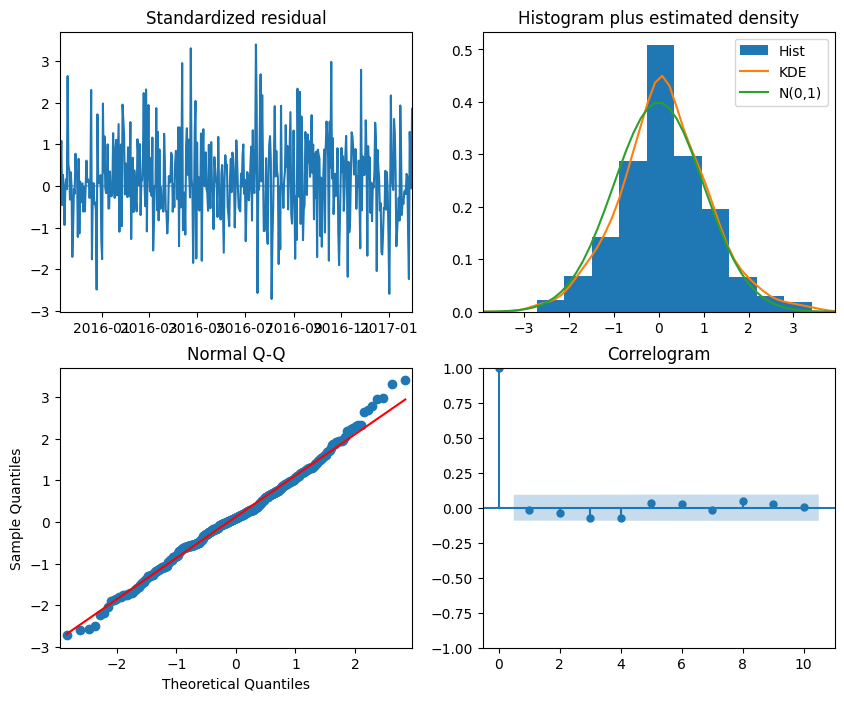

In [ ]:
arima_model.plot_diagnostics(figsize=(10, 8))
plt.show()

In [ ]:
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the test data using the auto_arima model
predicted_values_autoarima = arima_model.predict(n_periods=len(test_data))

# Calculate RMSE
rmse_autoarima = np.sqrt(mean_squared_error(test_data, predicted_values_autoarima))
print(f"Root Mean Squared Error (RMSE) - Auto ARIMA: {rmse_autoarima}")

# Create a Plotly figure
fig_autoarima = go.Figure()

# Add actual traffic volume to the plot (Train Data)
fig_autoarima.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Actual Traffic Volume (Train Data)', line=dict(color='blue')))

# Add actual traffic volume to the plot (Test Data)
fig_autoarima.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Actual Traffic Volume (Test Data)', line=dict(color='red')))

# Add predicted values to the plot
fig_autoarima.add_trace(go.Scatter(x=test_data.index, y=predicted_values_autoarima, mode='lines', name='Predicted Values (Auto ARIMA)', line=dict(color='yellow')))

# Add annotation for RMSE value at the top side of the chart
fig_autoarima.add_annotation(
    x=test_data.index[0],
    y=test_data.max(),
    text=f'RMSE: {rmse_autoarima:.2f}',
    showarrow=False,
    xanchor='left',
    yanchor='top',
    bordercolor='white',
    borderwidth=2,
    bgcolor='black',
    font=dict(color='white'),
)

# Update layout for better formatting
fig_autoarima.update_layout(
    title='Auto ARIMA Model Prediction on Test Data',
    xaxis=dict(title='Time', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),
    yaxis=dict(title='Traffic Volume', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    legend=dict(font=dict(color='white')),
    width=1200,
    height=600
)

# Show the figure
fig_autoarima.show()


Root Mean Squared Error (RMSE) - Auto ARIMA: 4.522505430998661


In [ ]:


# Number of days for out-of-sample prediction
forecast_days_autoarima = 30

# Make out-of-sample predictions using the auto_arima model
forecast_values_autoarima = arima_model.predict(n_periods=forecast_days_autoarima)

# Extend the time index for forecast values
forecast_index_autoarima = pd.date_range(start=test_data.index[-1] + pd.Timedelta(hours=1), periods=forecast_days_autoarima, freq='D')

# Create a Plotly figure
fig_autoarima_forecast = go.Figure()

# Add actual traffic volume to the plot (Train Data)
fig_autoarima_forecast.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name='Actual Traffic Volume (Train Data)', line=dict(color='blue')))

# Add actual traffic volume to the plot (Test Data)
fig_autoarima_forecast.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name='Actual Traffic Volume (Test Data)', line=dict(color='red')))

# Add predicted values to the plot
fig_autoarima_forecast.add_trace(go.Scatter(x=test.index, y=predicted_values_autoarima, mode='lines', name='Predicted Values (Auto ARIMA)', line=dict(color='yellow')))

# Add forecast values to the plot
fig_autoarima_forecast.add_trace(go.Scatter(x=forecast_index_autoarima, y=forecast_values_autoarima, mode='lines', name='Forecast Values (Auto ARIMA)', line=dict(color='green')))

# Update layout for better formatting
fig_autoarima_forecast.update_layout(
    title='Auto ARIMA Model Prediction on Test Data with Out-of-Sample Forecast',
    xaxis=dict(title='Time', range=[train_data.index[0], forecast_index_autoarima[-1]], showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),
    yaxis=dict(title='Traffic Volume', showgrid=True, gridcolor='rgba(255, 255, 255, 0.1)'),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    legend=dict(font=dict(color='white')),
    width=1200,
    height=600
)

# Show the figure
fig_autoarima_forecast.show()


SARIMA

In [ ]:
from itertools import product

# Setting initial values and some bounds for them
ps = range(1, 3)
d = 0
qs = range(1, 3)
Ps = range(1, 3)
D = 0
Qs = range(1, 3)
s = 7  # Season length

# Creating a list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)



In [ ]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC

        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order
        s - length of season
    """

    results = []
    best_aic = float("inf")

    for param in tqdm(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(daily_junc1, order=(param[0], d, param[1]),
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

    return result_table

In [ ]:
%%time
result_table = optimizeSARIMA(parameters_list, d, D, s)

NameError: name 'tqdm' is not defined

In [ ]:
result_table.head()

NameError: name 'result_table' is not defined

In [ ]:
#set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(df2['Vehicles'], order=(p, d, q),
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

In [ ]:
!pip install some_library


In [ ]:
from some_module import tsplot
tsplot(best_model.resid[7+1:], lags=30)

In [ ]:
def plotSARIMA(series, model, n_steps):

    # adding model values
    data = df2.copy()
    #data.columns = ['actual']
    data['sarima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['sarima_model'][:s+d] = np.NaN

    # forecasting on n_steps forward
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.sarima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    #error = mean_absolute_percentage_error(data[s+d:-1].values, data['sarima_model'][s+d:].values)
    error = np.sqrt(mean_squared_error(data[s+d:-1].values, data['sarima_model'][s+d:].values))



In [ ]:
import matplotlib.pyplot as plt

# Assuming df2['Vehicles'] is your time series
# Make sure to replace df2['Vehicles'] with your actual time series name
# Replace 'your_sarima_model' with the actual SARIMA model instance
plotSARIMA(df2['Vehicles'], your_sarima_model, n_steps=30)


In [ ]:
  plt.figure(figsize=(15, 7))
    #plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.title("Root Mean Square Error: {0:.2f}".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-2], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(df2, label="actual")
    plt.legend()
    plt.grid(True);

In [ ]:
plotSARIMA(df2, best_model, 30)

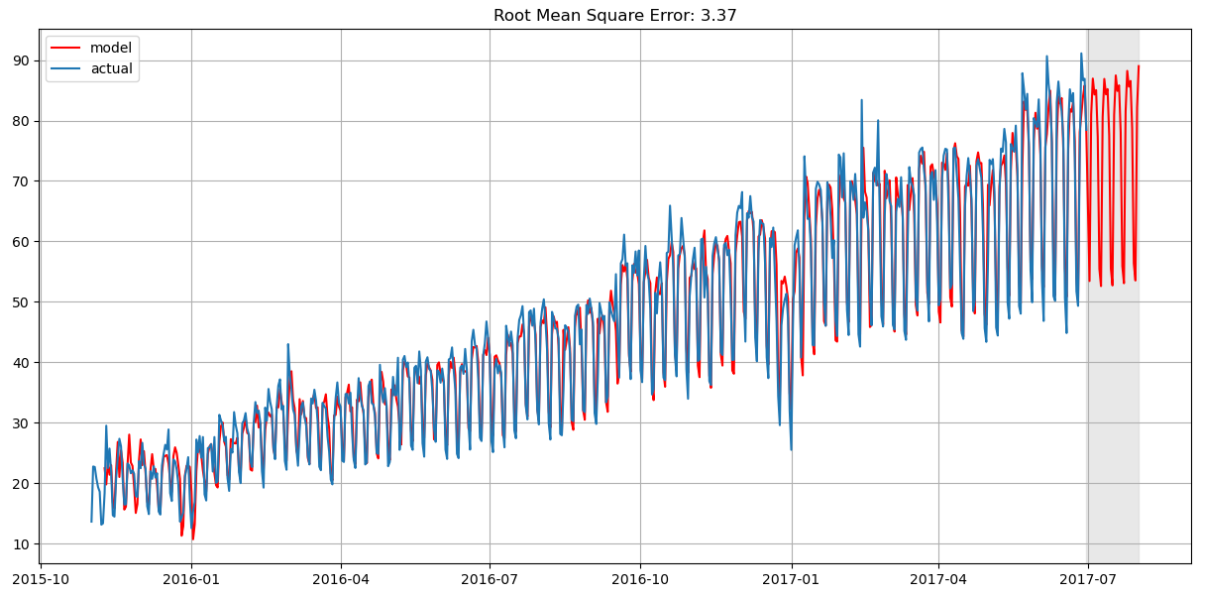

In [ ]:

#model = auto_arima(df['Vehicles'] ,seasonal=True, suppress_warnings=True)
#print(model.summary())

In [ ]:
# predict next 30 days
#forecast = model. predict(n_periods=30)
# Convert forecasted values to integers
#forecast_int = np.round(forecast).astype(int)
#print(forecast)

In [ ]:
#model.plot_diagnostics(figsize=(10, 8))
#plt.show()